In [138]:
import pandas as pd
import json
from preprocessing import preprocess,drop_constant,drop_unique
import numpy as np
import scipy
from scipy.stats import skewtest,kurtosistest,skew,kurtosis,normaltest


In [139]:
df_train = pd.read_csv('datasets/train_radiomics_hipocamp.csv')
df_test = pd.read_csv('datasets/test_radiomics_hipocamp.csv')

X = drop_constant(df_train)
X = drop_unique(X)

X.select_dtypes('number').columns

Index(['diagnostics_Image-original_Mean', 'diagnostics_Image-original_Maximum',
       'diagnostics_Mask-original_VoxelNum', 'original_shape_Elongation',
       'original_shape_Flatness', 'original_shape_LeastAxisLength',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       ...
       'lbp-3D-k_glszm_ZoneEntropy', 'lbp-3D-k_glszm_ZonePercentage',
       'lbp-3D-k_glszm_ZoneVariance', 'lbp-3D-k_ngtdm_Busyness',
       'lbp-3D-k_ngtdm_Coarseness', 'lbp-3D-k_ngtdm_Complexity',
       'lbp-3D-k_ngtdm_Contrast', 'lbp-3D-k_ngtdm_Strength', 'Sex', 'Age'],
      dtype='object', length=2013)

# Normalidade dos dados

In [140]:
_,p_val_less = skewtest(X.select_dtypes('number'),alternative='less')
_,p_val_greater = skewtest(X.select_dtypes('number'),alternative='greater')
named_stats = zip(X.columns, p_val_less, p_val_greater)
skew_less = [(name)for (name,p_val_less,p_val_greater) in named_stats if p_val_less<.01]
greater = [(name)for (name,p_val_less,p_val_greater) in named_stats if p_val_greater<.01]
print("there are", len(skew_less+greater),"skewed features ")
print("there are", len(greater),"positively skewed features")
print("there are", len(skew_less),"negatively skewed features")

there are 342 skewed features 
there are 0 positively skewed features
there are 342 negatively skewed features


In [141]:
_,p_val_less = kurtosistest(X.select_dtypes('number'),alternative='less')
_,p_val_greater = kurtosistest(X.select_dtypes('number'),alternative='greater')
named_stats = zip(X.columns, p_val_less, p_val_greater)
kurt_less = [(name)for (name,p_val_less,p_val_greater) in named_stats if p_val_less<.01]
greater = [(name)for (name,p_val_less,p_val_greater) in named_stats if p_val_greater<.01]
print("there are", len(kurt_less+greater),"kurtosised features ")
print("there are", len(greater),"positively kurtosised features")
print("there are", len(kurt_less),"negatively kurtosised features")


there are 152 kurtosised features 
there are 0 positively kurtosised features
there are 152 negatively kurtosised features


In [142]:
len({name for name in  kurt_less} & {name for name in skew_less })

32

In [143]:
_,p_value = normaltest(X.select_dtypes('number'))
named_stats = zip(X.columns,p_value)
normal = [(name)for (name,p_value) in named_stats if p_value<.01]
print("there are", len(normal),"normally distributed features ")

there are 1477 normally distributed features 


# Range

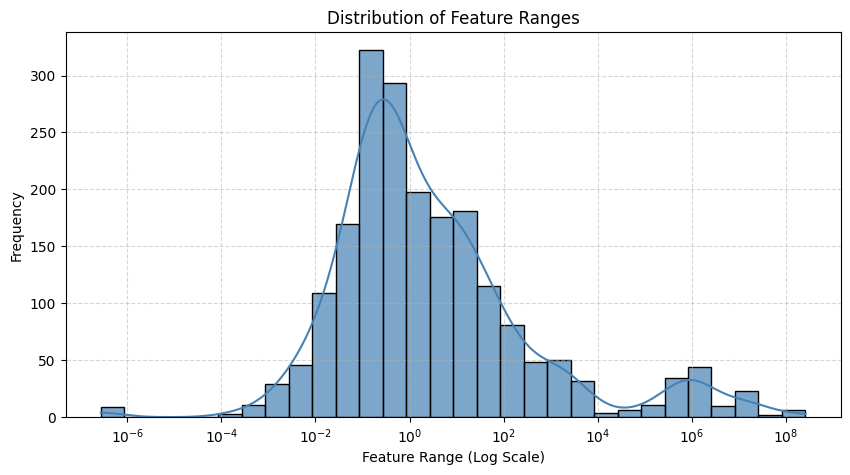

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is a DataFrame
column_min = np.min(X.select_dtypes('number'), axis=0)
column_max = np.max(X.select_dtypes('number'), axis=0)
ranges = column_max - column_min  # Feature ranges

# Plot settings
plt.figure(figsize=(10, 5))

# Histogram + KDE for better distribution visualization
sns.histplot(ranges, bins=30, kde=True, log_scale=True, color="steelblue", alpha=0.7)

# Scatter overlay to retain individual point info
ranges_unique, counts = np.unique(ranges, return_counts=True)
sizes = counts * 20
colors = ['#00f'] * len(ranges_unique)
colors[-1] = '#f00'  # Highlight the max value

# plt.scatter(ranges_unique, np.full_like(ranges_unique, 0.01), s=sizes, color=colors)

# Labels and style
plt.xscale('log')  # Log scale for better range distribution
plt.xlabel("Feature Range (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Feature Ranges")
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()


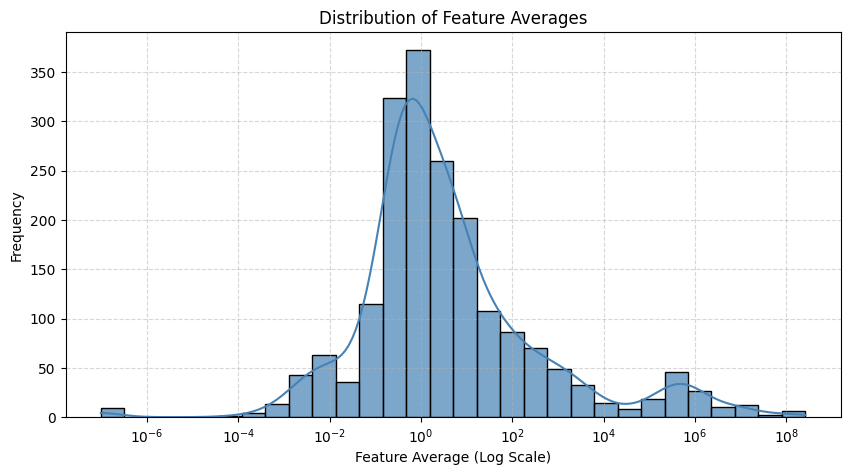

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is a DataFrame
averages = np.average(X.select_dtypes('number'), axis=0)

# Plot settings
plt.figure(figsize=(10, 5))

# Histogram + KDE for better distribution visualization
sns.histplot(averages, bins=30, kde=True, log_scale=True, color="steelblue", alpha=0.7)

# Scatter overlay to retain individual point info
averages_unique, counts = np.unique(averages, return_counts=True)
sizes = counts * 20
colors = ['#00f'] * len(averages_unique)
colors[-1] = '#f00'  # Highlight the max value

# plt.scatter(averages_unique, np.full_like(averages_unique, 0.01), s=sizes, color=colors)

# Labels and style
plt.xscale('log')  # Log scale for better range distribution
plt.xlabel("Feature Average (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Feature Averages")
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()